# Imports

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt

# Charger, observer et comprendre le dataset

In [2]:
main_df = pd.read_csv('./datas/credit.csv')

In [3]:
main_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
main_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
main_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

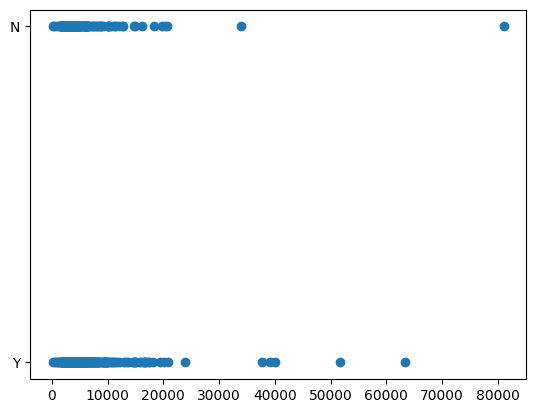

In [6]:
plt.scatter(main_df["ApplicantIncome"], main_df["Loan_Status"])

(array([422.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 192.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

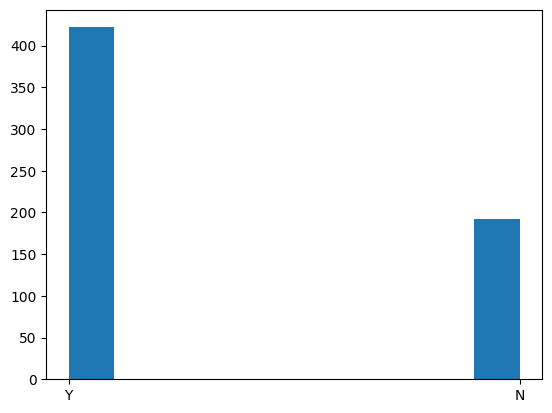

In [7]:
plt.hist(main_df["Loan_Status"])

# Transformer les données catégorielles en données numériques

In [8]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [9]:
ord_encoder= OrdinalEncoder(unknown_value=-1, handle_unknown='use_encoded_value')
label_encoder = LabelEncoder()

In [10]:
features = main_df.columns[:-1]
features.drop("Loan_ID")

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [11]:
X = main_df[features]
y = main_df["Loan_Status"]
y = label_encoder.fit_transform(y)
X = ord_encoder.fit_transform(X)

In [12]:
X

array([[  0.,   1.,   0., ...,   8.,   1.,   2.],
       [  1.,   1.,   1., ...,   8.,   1.,   0.],
       [  2.,   1.,   1., ...,   8.,   1.,   2.],
       ...,
       [611.,   1.,   1., ...,   8.,   1.,   2.],
       [612.,   1.,   1., ...,   8.,   1.,   2.],
       [613.,   0.,   0., ...,   8.,   0.,   1.]])

# Afficher et traiter les données manquantes
Pour traiter les données manquantes, regarder `SimpleImputer` ou `KNNImputer`

In [13]:
from sklearn.impute import KNNImputer

In [14]:
imputer = KNNImputer()

In [15]:
X = imputer.fit_transform(X)

In [16]:
X

array([[  0.,   1.,   0., ...,   8.,   1.,   2.],
       [  1.,   1.,   1., ...,   8.,   1.,   0.],
       [  2.,   1.,   1., ...,   8.,   1.,   2.],
       ...,
       [611.,   1.,   1., ...,   8.,   1.,   2.],
       [612.,   1.,   1., ...,   8.,   1.,   2.],
       [613.,   0.,   0., ...,   8.,   0.,   1.]])

# Standardiser les données

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
normalize = StandardScaler()

In [19]:
X = normalize.fit_transform(X)

# Séparer le dataset en train et test

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
corr_df = pd.DataFrame(X, columns=features)
corr_df["Loan_Status"] = y

<Axes: >

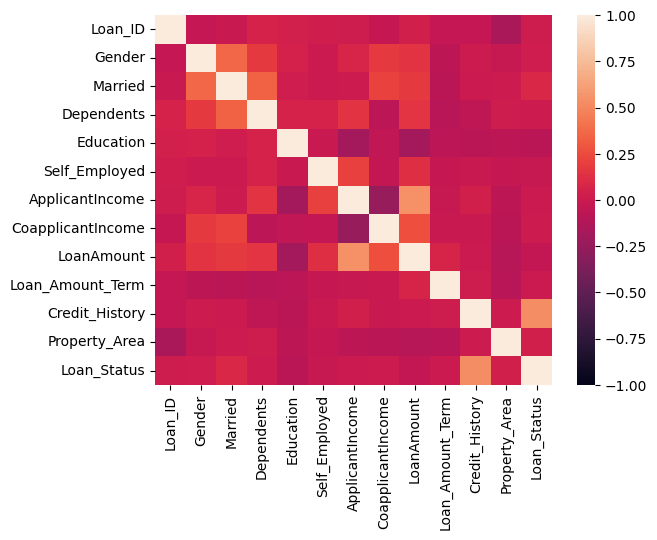

In [22]:
import seaborn as sns
sns.heatmap(corr_df.corr(), annot=False, vmin=-1, vmax=1)

In [23]:
# Boruta
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1)
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1,n_iter_no_change=100)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [25]:
boruta_selector.fit(X_train, y_train)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	9
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	9
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	9
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	9
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	9
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	9
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	9
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	9
Iteration: 	16 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	9
Iteration:

BorutaPy(estimator=RandomForestClassifier(n_estimators=20, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x1FFFB7C7140),
         n_estimators='auto', n_iter_no_change=100,
         random_state=RandomState(MT19937) at 0x1FFFB7C7140, verbose=2)

In [26]:
features = [f for f, s in enumerate( boruta_selector.ranking_) if s < 6]

X_train = X_train[:,features]
X_test = X_test[:,features]

# Régression logistique
Entrainer une régression logistique avec les hyper-paramètres par défaut

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
print(f'Scoring of default {model.__class__} train: {model.score(X_train,y_train)}')
print(f'Scoring of default {model.__class__} test : {model.score(X_test,y_test)}')

Scoring of default <class 'sklearn.linear_model._logistic.LogisticRegression'> train: 0.808695652173913
Scoring of default <class 'sklearn.linear_model._logistic.LogisticRegression'> test : 0.7922077922077922


# KNN
Entrainer un KNN avec les hyper-paramètres par défaut
Avec `GridSearchCV` ou `RandomizedSearchCV`, optimiser les hyper-paramètres. Utiliser une validation croisée de 5 splits. Vous explorerez les paramètres suivants:
- k : 3, 5, 7, 9, 11,
- poids : uniform, distance,
- distances : euclidean, manhattan, minkowski

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
print(f'Scoring of default {model.__class__} train: {model.score(X_train,y_train)}')
print(f'Scoring of default {model.__class__} test : {model.score(X_test,y_test)}')

Scoring of default <class 'sklearn.neighbors._classification.KNeighborsClassifier'> train: 0.8217391304347826
Scoring of default <class 'sklearn.neighbors._classification.KNeighborsClassifier'> test : 0.7792207792207793


In [32]:
knn_param = {
"n_neighbors" : [3, 5, 7, 9, 11],
"weights" : ["uniform", "distance"],
"metric" : ["euclidean", "manhattan", "minkowski"]
}

In [33]:
gscv = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=knn_param, cv=5)

In [34]:
gscv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [35]:
model = gscv.best_estimator_
print(f'Scoring of default {model.__class__} train: {model.score(X_train,y_train)}')
print(f'Scoring of default {model.__class__} test : {model.score(X_test,y_test)}')
print(f'Best hyperparameters {gscv.best_params_}')

Scoring of default <class 'sklearn.neighbors._classification.KNeighborsClassifier'> train: 0.8195652173913044
Scoring of default <class 'sklearn.neighbors._classification.KNeighborsClassifier'> test : 0.7857142857142857
Best hyperparameters {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


In [36]:
best_model = KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='uniform')
best_model.fit(X_train,y_train)
print(f'Scoring of default {best_model.__class__} train: {best_model.score(X_train,y_train)}')
print(f'Scoring of default {best_model.__class__} test : {best_model.score(X_test,y_test)}')

Scoring of default <class 'sklearn.neighbors._classification.KNeighborsClassifier'> train: 0.8173913043478261
Scoring of default <class 'sklearn.neighbors._classification.KNeighborsClassifier'> test : 0.7922077922077922


# SVM
Entrainer un SVM avec les hyper-paramètres par défaut
Avec `GridSearchCV` ou `RandomizedSearchCV`, optimiser les hyper-paramètres. Utiliser une validation croisée de 5 splits. Vous explorerez les paramètres suivants:
- C : 0.01, 0.1, 1, 10, 100,
- noyau : linear, poly, rbf, sigmoid,
- gamma : scale, auto, 0.001, 0.01, 0.1, 1,
- degrée du polynome : 2, 3, 4, 5

In [37]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
print(f'Scoring of default {model.__class__} train: {model.score(X_train,y_train)}')
print(f'Scoring of default {model.__class__} test : {model.score(X_test,y_test)}')

Scoring of default <class 'sklearn.svm._classes.SVC'> train: 0.8152173913043478
Scoring of default <class 'sklearn.svm._classes.SVC'> test : 0.7922077922077922


In [38]:
svm_param_grid = {
    "C" : [0.01, 0.1, 1, 10, 100],
"kernel" : ["linear", "poly", "rbf", "sigmoid"],
"gamma" : ["scale", "auto", 0.001, 0.01, 0.1, 1],
"degree" : [2, 3, 4, 5]
}

In [40]:
gscv_svm = RandomizedSearchCV(SVC(),param_distributions=svm_param_grid,cv=5, n_iter=100)

In [41]:
gscv_svm.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'degree': [2, 3, 4, 5],
                                        'gamma': ['scale', 'auto', 0.001, 0.01,
                                                  0.1, 1],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [42]:
model = gscv_svm.best_estimator_
print(f'Scoring of default {model.__class__} train: {model.score(X_train,y_train)}')
print(f'Scoring of default {model.__class__} test : {model.score(X_test,y_test)}')
print(f'Best hyperparameters {gscv_svm.best_params_}')

Scoring of default <class 'sklearn.svm._classes.SVC'> train: 0.8152173913043478
Scoring of default <class 'sklearn.svm._classes.SVC'> test : 0.7922077922077922
Best hyperparameters {'kernel': 'poly', 'gamma': 1, 'degree': 3, 'C': 100}


In [43]:
best_model = SVC(C=10, degree=2, gamma=0.01, kernel='rbf')
best_model.fit(X_train,y_train)
print(f'Scoring of default {best_model.__class__} train: {best_model.score(X_train,y_train)}')
print(f'Scoring of default {best_model.__class__} test : {best_model.score(X_test,y_test)}')

Scoring of default <class 'sklearn.svm._classes.SVC'> train: 0.8108695652173913
Scoring of default <class 'sklearn.svm._classes.SVC'> test : 0.7922077922077922


# DecisionTree
Entrainer un arbre de décision avec les hyper-paramètres par défaut
Avec `GridSearchCV` ou `RandomizedSearchCV`, optimiser les hyper-paramètres. Utiliser une validation croisée de 5 splits. Vous explorerez les hyper-paramètres suivants:
- critère : gini, entropy,
- profondeur maximale : None, 10, 20, 30, 40, 50,
- nombre minimum d'exemples par split : 2, 5, 10, 20,
- nombre minimum d'exemples par feuille : 1, 2, 4, 6,
- nombre de features maximum : None, sqrt, log2

In [44]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
print(f'Scoring of default {model.__class__} train: {model.score(X_train,y_train)}')
print(f'Scoring of default {model.__class__} test : {model.score(X_test,y_test)}')

Scoring of default <class 'sklearn.tree._classes.DecisionTreeClassifier'> train: 1.0
Scoring of default <class 'sklearn.tree._classes.DecisionTreeClassifier'> test : 0.7077922077922078


In [45]:
tree_param_grid = {
"criterion" : ["gini", "entropy"],
"max_depth": [None, 10, 20, 30, 40, 50],
"min_samples_split" : [2, 5, 10, 20],
"min_samples_leaf" : [1, 2, 4, 6],
"max_features" : [None, "sqrt", "log2"]
}

In [46]:
gscv_tree = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=tree_param_grid, cv=5, n_iter=100)

In [47]:
gscv_tree.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10, 20]})

In [48]:
model = gscv_tree.best_estimator_
print(f'Scoring of default {model.__class__} train: {model.score(X_train,y_train)}')
print(f'Scoring of default {model.__class__} test : {model.score(X_test,y_test)}')
print(f'Best hyperparameters {gscv_tree.best_params_}')

Scoring of default <class 'sklearn.tree._classes.DecisionTreeClassifier'> train: 0.8565217391304348
Scoring of default <class 'sklearn.tree._classes.DecisionTreeClassifier'> test : 0.7662337662337663
Best hyperparameters {'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}


In [49]:
best_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2', min_samples_leaf=2, min_samples_split=20)
best_model.fit(X_train,y_train)
print(f'Scoring of default {best_model.__class__} train: {best_model.score(X_train,y_train)}')
print(f'Scoring of default {best_model.__class__} test : {best_model.score(X_test,y_test)}')

Scoring of default <class 'sklearn.tree._classes.DecisionTreeClassifier'> train: 0.8565217391304348
Scoring of default <class 'sklearn.tree._classes.DecisionTreeClassifier'> test : 0.7727272727272727


# RandomForest
Entrainer une forêt aléatoire avec les paramètres par défaut
Avec `GridSearchCV` ou `RandomizedSearchCV`, optimiser les hyper-paramètres. Utiliser une validation croisée de 5 splits. Vous explorerez les hyper-paramètres suivants:
- nombre d'arbres : 50, 100, 200, 300,
- critère : gini, entropy,
- profondeur maximale : None, 10, 20, 30, 40, 50,
- nombre minimum d'exemples par split : 2, 5, 10, 20,
- nombre minimum d'exemples par feuille : 1, 2, 4, 6,
- nombre de features maximum : None, sqrt, log2,
- remise des exemples : vrai, faux

In [50]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
print(f'Scoring of default {model.__class__} train: {model.score(X_train,y_train)}')
print(f'Scoring of default {model.__class__} test : {model.score(X_test,y_test)}')

Scoring of default <class 'sklearn.ensemble._forest.RandomForestClassifier'> train: 1.0
Scoring of default <class 'sklearn.ensemble._forest.RandomForestClassifier'> test : 0.7467532467532467


In [63]:
random_param_grid = {
    "n_estimators" : [50, 100, 200, 300],
"criterion" : ["gini", "entropy"],
"max_depth" : [None, 10, 20, 30, 40, 50],
"min_samples_split": [2, 5, 10, 20],
"min_samples_leaf": [1, 2, 4, 6],
"max_features" : [None, "sqrt", "log2"],
"bootstrap" : [True, False]
}

In [64]:
gscv_random = GridSearchCV(RandomForestClassifier(n_jobs=-1), param_grid=random_param_grid, cv=5, n_jobs=-1, )

In [65]:
gscv_random.fit(X_train, y_train)

KeyboardInterrupt: 

In [54]:
model = gscv_random.best_estimator_
print(f'Scoring of default {model.__class__} train: {model.score(X_train,y_train)}')
print(f'Scoring of default {model.__class__} test : {model.score(X_test,y_test)}')
print(f'Best hyperparameters {gscv_random.best_params_}')

Scoring of default <class 'sklearn.ensemble._forest.RandomForestClassifier'> train: 0.85
Scoring of default <class 'sklearn.ensemble._forest.RandomForestClassifier'> test : 0.7792207792207793
Best hyperparameters {'n_estimators': 300, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini', 'bootstrap': False}


In [68]:
best_model = RandomForestClassifier(criterion='gini', bootstrap=False, max_depth=10, max_features='log2', min_samples_leaf=4, min_samples_split=20, n_estimators=300, n_jobs=-1)
best_model.fit(X_train,y_train)
print(f'Scoring of default {best_model.__class__} train: {best_model.score(X_train,y_train)}')
print(f'Scoring of default {best_model.__class__} test : {best_model.score(X_test,y_test)}')

Scoring of default <class 'sklearn.ensemble._forest.RandomForestClassifier'> train: 0.8521739130434782
Scoring of default <class 'sklearn.ensemble._forest.RandomForestClassifier'> test : 0.7792207792207793


# XGBoost

In [128]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
print(f'Scoring of default {model.__class__} train: {model.score(X_train,y_train)}')
print(f'Scoring of default {model.__class__} test : {model.score(X_test,y_test)}')

Scoring of default <class 'sklearn.ensemble._gb.GradientBoostingClassifier'> train: 0.9130434782608695
Scoring of default <class 'sklearn.ensemble._gb.GradientBoostingClassifier'> test : 0.7857142857142857


In [172]:
gradient_param_grid = {
    "n_estimators" : [50, 100, 200, 300],
"learning_rate" : [0.01, 0.1, 1],
"max_depth" : [3, 4, 5, 6],
"tol" : [0.0001, 0.001, 0.01, 1, 2, 3, 4, 5],
"min_samples_split": [2, 5],
"min_samples_leaf": [1, 2, 4, 6],
"max_features" : [None, "sqrt", "log2"]
    }

In [173]:
gscv_gradient = RandomizedSearchCV(GradientBoostingClassifier(), param_distributions=gradient_param_grid, cv=5, n_iter=1000, n_jobs=-1)

In [174]:
gscv_gradient.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=1000,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1],
                                        'max_depth': [3, 4, 5, 6],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100, 200, 300],
                                        'tol': [0.0001, 0.001, 0.01, 1, 2, 3, 4,
                                                5]})

In [175]:
model = gscv_gradient.best_estimator_
print(f'Scoring of default {model.__class__} train: {model.score(X_train,y_train)}')
print(f'Scoring of default {model.__class__} test : {model.score(X_test,y_test)}')
print(f'Best hyperparameters {gscv_gradient.best_params_}')

Scoring of default <class 'sklearn.ensemble._gb.GradientBoostingClassifier'> train: 0.8304347826086956
Scoring of default <class 'sklearn.ensemble._gb.GradientBoostingClassifier'> test : 0.7727272727272727
Best hyperparameters {'tol': 4, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 4, 'learning_rate': 0.01}


# Neural Network

In [156]:
from sklearn.neural_network import MLPClassifier
# 64 & 32 hidden layers
model = MLPClassifier(
    hidden_layer_sizes=(64,32),
    activation='relu',
    max_iter=1000
)
model.fit(X_train,y_train)
print(f'Scoring of default {model.__class__} train: {model.score(X_train,y_train)}')
print(f'Scoring of default {model.__class__} test : {model.score(X_test,y_test)}')

Scoring of default <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'> train: 0.9521739130434783
Scoring of default <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'> test : 0.7727272727272727


C:\Users\jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [159]:
model = MLPClassifier(
    hidden_layer_sizes=(128,64,32),
    activation='relu',
    max_iter=1000
)
print(model.get_params())
model.fit(X_train,y_train)
print(f'Scoring of default {model.__class__} train: {model.score(X_train,y_train)}')
print(f'Scoring of default {model.__class__} test : {model.score(X_test,y_test)}')

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Scoring of default <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'> train: 0.9695652173913043
Scoring of default <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'> test : 0.7142857142857143


In [171]:
from sklearn.neural_network import MLPClassifier
# 64 & 32 hidden layers
model = MLPClassifier(
    hidden_layer_sizes=(16,16,16),
    activation='relu',
    max_iter=10000
)
model.fit(X_train,y_train)
print(f'Scoring of default {model.__class__} train: {model.score(X_train,y_train)}')
print(f'Scoring of default {model.__class__} test : {model.score(X_test,y_test)}')

Scoring of default <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'> train: 0.8978260869565218
Scoring of default <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'> test : 0.7532467532467533


# Rapporter et analyser les résultats obtenir. Choisir le meilleur modèle

| Algo | Hyperparameters | Train Acc | Test acc |
|------|-----------------|-----------|----------|
|Logistic regression|Default|0.79|0.81|
|KNNClassifier|Default|0.8|0.77|
|KNNClassifier|{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}|0.8|0.74|
|SVM|Default|0.81|0.82|
|SVM|{'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}|0.8|0.82|
|DecisionTree|Default|1|0.66|
|DecisionTree|{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 20}|0.85|0.72|
|RandomForest|Default|1|0.79|
|RandomForest|'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': 40, 'criterion': 'entropy', 'bootstrap': False|0.88|0.82|


# Analyser le meilleur modèle
En utilisant `classification_report`, afficher différentes métriques en train et en test du modèle choisit. Afficher la matrice de confusion en train et en test de ce même modèle. Qu'en concluez-vous sur la qualité de ce modèle?

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.42      0.56        48
           1       0.78      0.96      0.86       106

    accuracy                           0.79       154
   macro avg       0.81      0.69      0.71       154
weighted avg       0.80      0.79      0.77       154



Le modèle est bon pour prédire les refus de prêts mais lorsque le prêt est refusé par le modele, il a quasiment 1 chance sur deux de se tromper

# Explicabilité

In [97]:
import shap
features = main_df.columns[:-1]
features_index = [f for f, s in enumerate( boruta_selector.ranking_) if s < 6]
features = features[features_index]
features

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Credit_History'],
      dtype='object')

In [100]:
shap.initjs()
explainer = shap.Explainer(best_model.predict, X_train, feature_names=features)
shap_values = explainer(X_train)

ExactExplainer explainer: 461it [01:06,  5.84it/s]                         


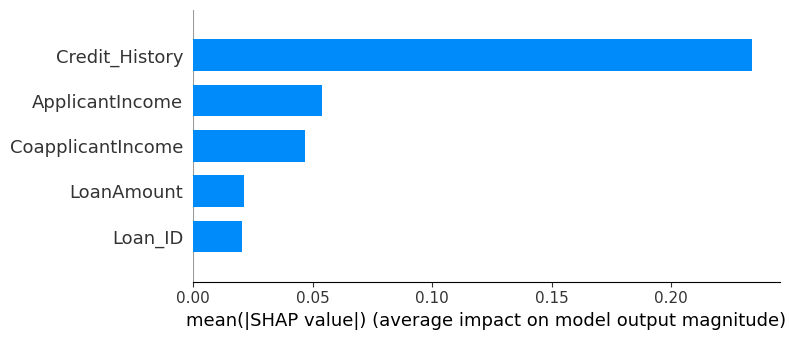

In [105]:
shap.summary_plot(shap_values, X_train,plot_type='bar')

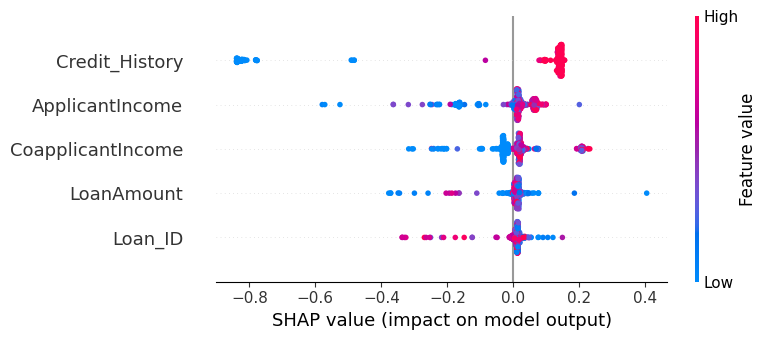

In [ ]:
shap.summary_plot(shap_values, X_train)


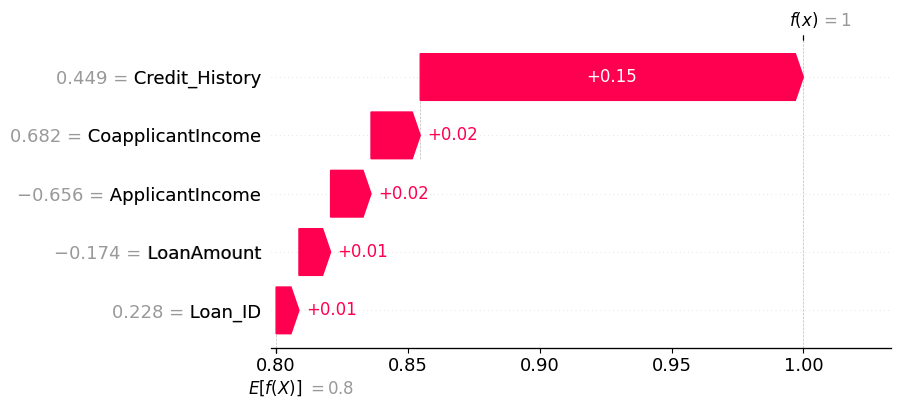

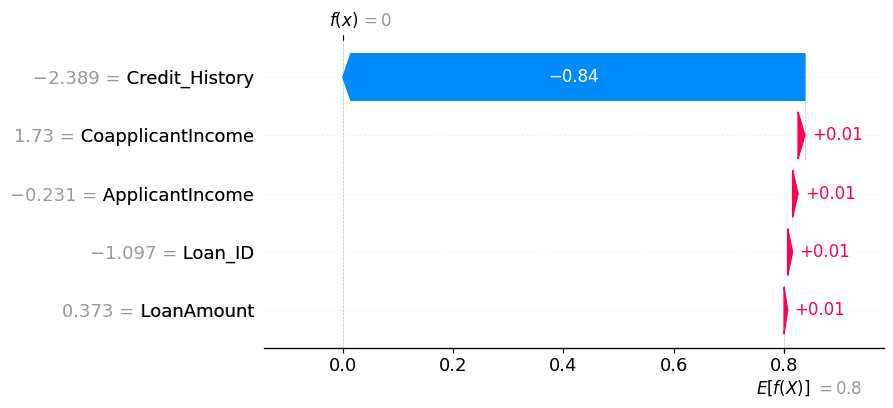

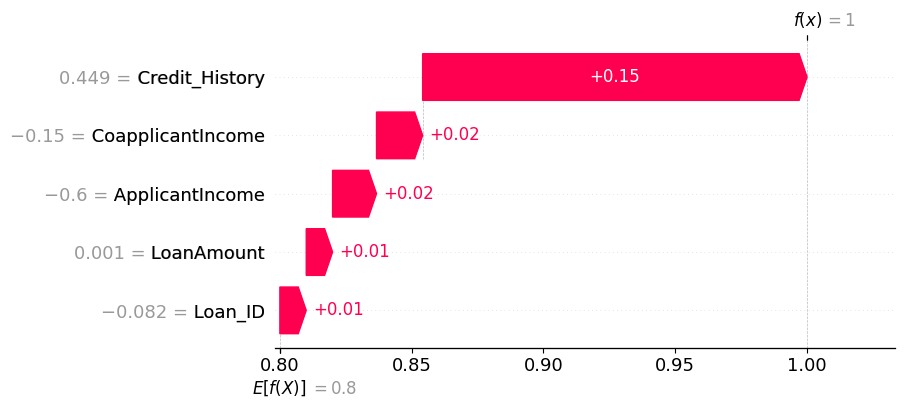

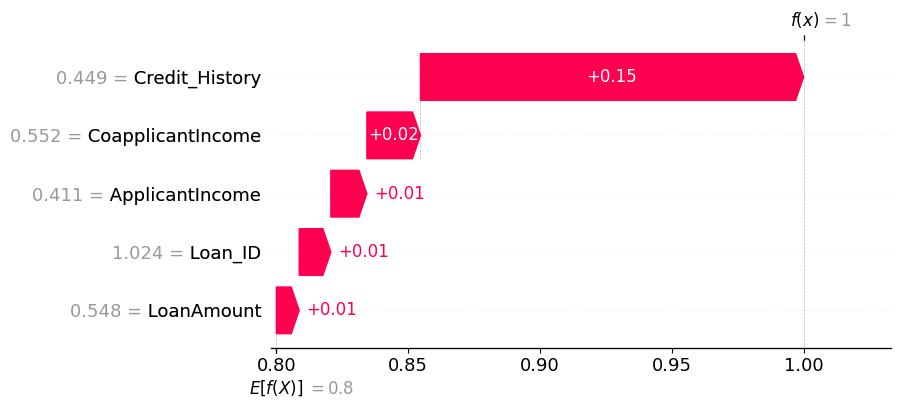

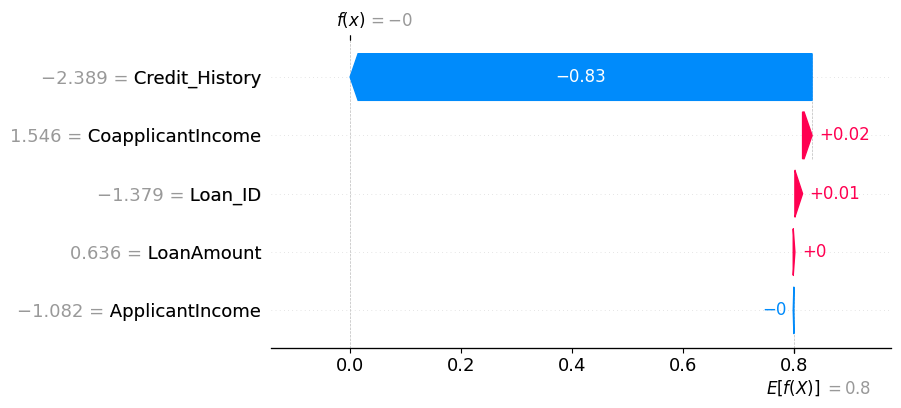

In [114]:
for i in range(5):
    shap.plots.waterfall(shap_values[i])

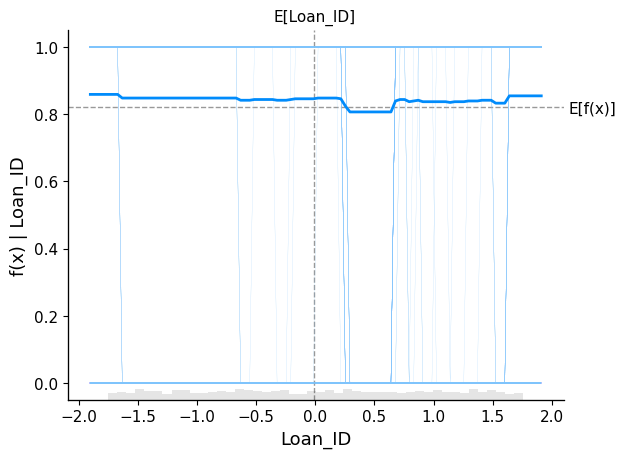

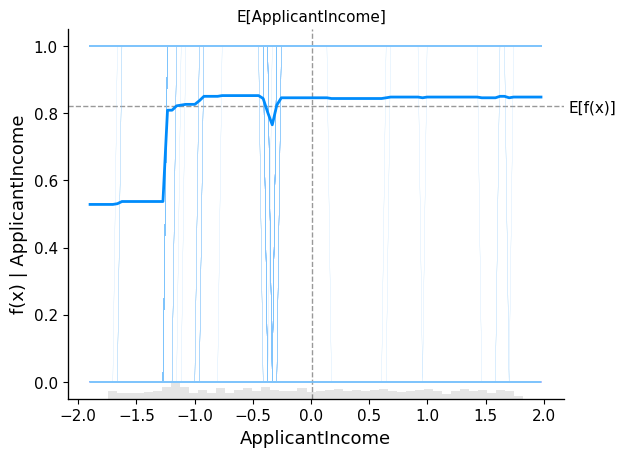

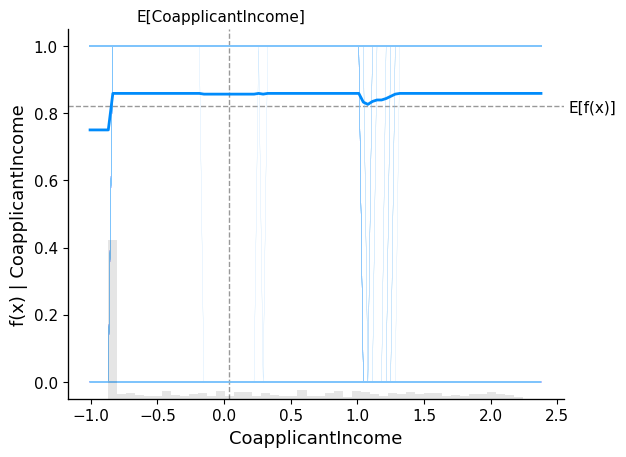

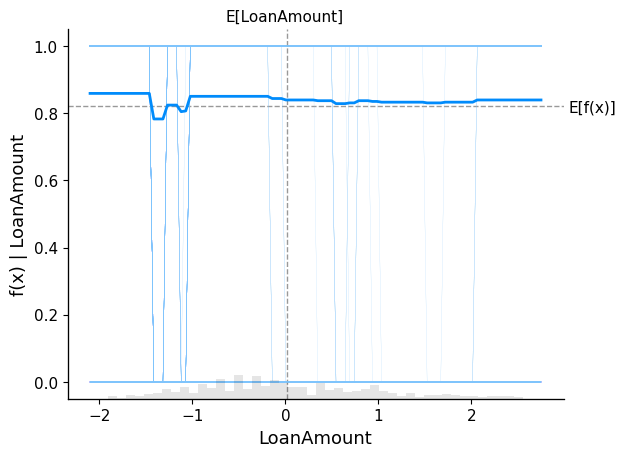

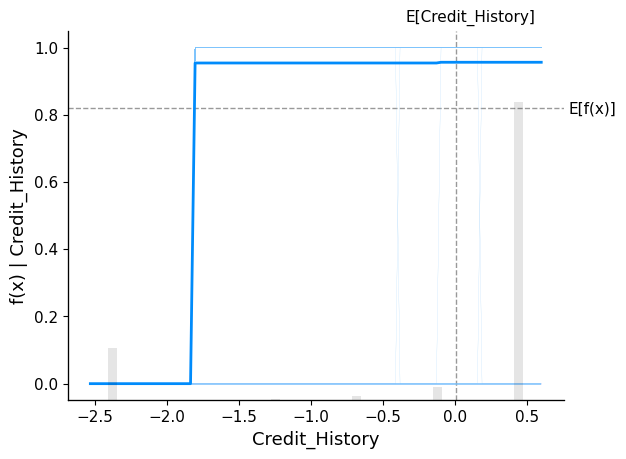

In [127]:
for i in range(len(features)):
    shap.plots.partial_dependence(ind=i,
                              feature_names= features,
                              model=best_model.predict,
                              data=X_train,
                              model_expected_value=True,
                              feature_expected_value=True,
                              ice=True,
                              )